##  Contents<a id='2.1_Contents'></a>
* [ Data wrangling](#2_Data_wrangling)
  * [ Contents](#2.1_Contents)
  * [ Introduction](#2.2_Introduction)
    * [ Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [ Introduction To Notebook](#2.2.2_Introduction_To_Notebook)
  * [ Imports](#2.3_Imports)
  * [ Objectives](#2.4_Objectives)
  * [ Load The Data](#2.5_Load_The_Ski_Resort_Data)
  * [ Explore The Data](#2.6_Explore_The_Data)
    * [ Exploe the data](#2.6.1_Find_Your_Resort_Of_Interest)
    * [ Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [ Categorical Features](#2.6.3_Categorical_Features)
      * [ Unique  Names](#2.6.3.1_Unique_Resort_Names)
      * [ Distribution listings](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [ Distribution of price by room type](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [ Numeric Features](#2.6.4_Numeric_Features)
      * [ Numeric data summary](#2.6.4_Numeric_Features)
      * [ Distributions Of Feature Values](#2.6.4_Numeric_Features)
  * [ Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [ Review distributions](#2.9_Review_distributions)
  * [ Target Feature](#2.11_Target_Feature)
    * [ Number Of Missing Values By Row ](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [ Save data](#2.12_Save_data)
  * [ Summary](#2.13_Summary)


**Introduction**

This phase involves gathering, organizing, and ensuring clarity in the data. Being meticulous in these tasks will yield significant benefits later. While some data cleaning is possible here, it's crucial not to be too aggressive before thoroughly exploring the data for better comprehension. The aim of this section is to establish the essential data processing steps to adapt the dataset for subsequent analysis.

The data processing steps are formulated with the following objectives:

1. Ensuring columns have the correct data type.
2. Removing outliers from the dataset.
3. Introducing newly created features to the dataset.

It's important to emphasize that the primary focus of this section is to prepare a dataset for the next stage, which is data visualization. As more insights are gained, further modifications to the dataset will be made.

###  Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a pricing model for AIR BNB listing price in the Sattle, Washington state. The listing price seems to be inconsistent and varied with other features and availability. It also does not have a strong sense of what facilities matter most to guests, particularly which ones they're most likely to pay more for. This project aims to build a predictive model for listing price based on a number of facilities, or amenities. This model will be used to provide guidance for air bnb listing pricing and future  listing plans.

Data Collection

The data is collected from insideairbnb.com. It is an activist webiste that periodically scrap airbnb's database for listing information.

The following file is downloaded and unzipped into the file 'listings.csv' for analysis:
http://insideairbnb.com/get-the-data/

According to the information provided, the data is scraped on 09/18/2023.

**Import and Set-up**

In [327]:
# import required packages
import numpy as np
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)# setting maximum columns

In [328]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [329]:
df = pd.read_csv('/content/drive/MyDrive/DS-SB/Capstone-Two/listings.csv')

In [330]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6606,https://www.airbnb.com/rooms/6606,20230918050357,2023-09-18,city scrape,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,"This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,https://www.airbnb.com/users/show/14942,Joyce,2009-04-26,"Seattle, WA",I am a therapist/innkeeper.I know my city well...,within a day,100%,45%,f,https://a0.muscache.com/im/users/14942/profile...,https://a0.muscache.com/im/users/14942/profile...,Wallingford,4,5,"['email', 'phone']",t,t,"Seattle, Washington, United States",Wallingford,Other neighborhoods,47.65444,-122.33629,Entire guesthouse,Entire home/apt,1,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Shampoo"", ""Pet...",$99.00,30,1125,30,30,1125,1125,30.0,1125.0,NaN,t,27,57,87,177,2023-09-18,160,1,0,2009-07-17,2023-08-05,4.60,4.67,4.67,4.83,4.76,4.88,4.57,str-opli-19-002622,f,2,2,0,0,0.93
1,9419,https://www.airbnb.com/rooms/9419,20230918050357,2023-09-18,city scrape,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,Angielena,2009-08-09,"Seattle, WA",I am a visual artist who is the director ...,within a few hours,100%,99%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Georgetown,9,10,"['email', 'phone']",t,t,"Seattle, Washington, United States",Georgetown,Other neighborhoods,47.55017,-122.31937,Private room in rental unit,Private room,2,NaN,3 shared baths,NaN,1.0,"[""Extra pillows and blankets"", ""Shampoo"", ""Sha...",$85.00,2,90,2,2,90,90,2.0,90.0,NaN,t,30,60,90,365,2023-09-18,193,23,3,2010-07-30,2023-09-04,4.72,4.78,4.74,4.93,4.89,4.66,4.65,STR-OPLI-19-003039,f,9,0,9,0,1.21
2,9531,https://www.airbnb.com/rooms/9531,20230918050357,2023-09-18,city scrape,Home in Seattle · ★4.96 · 2 bedrooms · 3 beds ...,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,Cassie,2009-08-13,"Seattle, WA",The Sweet Orange reflects my passion and zest ...,within a day,100%,72%,t,https://a0.muscache.com/im/users/31481/profile...,https://a0.muscache.com/im/users/31481/profile...,The Junction,2,2,"['email', 'phone']",t,t,"Seattle, Washington, United States",Fairmount Park,West Seattle,47.55495,-122.38663,Entire home,Entire home/apt,4,NaN,1 bath,2.0,3.0,"[""Mountain view"", ""Extra pillows and blankets""...",$185.00,3

In [331]:
df.neighbourhood.value_counts()

Seattle, Washington, United States                     4987
Shoreline, Washington, United States                      6
Ballard, Seattle, Washington, United States               1
West Seattle, Washington, United States                   1
Ballard Seattle, Washington, United States                1
Capitol Hill, Seattle, Washington, United States          1
Seattle, United States                                    1
West Seattle, Washington, Washington, United States       1
Seattle, Wa, United States                                1
Seattle , Washington, United States                       1
Lake Forest Park, Washington, United States               1
Name: neighbourhood, dtype: int64

In [332]:
df.neighbourhood_cleansed.nunique()

89

In [333]:
df.neighbourhood_cleansed.isnull().sum()

0

In [334]:
num_columns = len(df.columns)
print(f"The DataFrame has {num_columns} columns.")

The DataFrame has 75 columns.


In [335]:
#Inspect those columns
df.iloc[:,[61,62,74]].head()

,review_scores_rating,review_scores_accuracy,reviews_per_month
0,4.60,4.67,0.93
1,4.72,4.78,1.21
2,4.96,4.99,0.54
3,4.99,4.99,0.53
4,4.56,4.55,0.65


In [336]:
import pandas as pd

# Assuming df is your DataFrame
# Check for missing values in the entire DataFrame
missing_values = df.isna().any().any()

if missing_values:
    print("The DataFrame contains missing values.")
else:
    print("The DataFrame does not contain any missing values.")


The DataFrame contains missing values.


In [337]:
import pandas as pd

# Assuming df is your DataFrame
# Check for missing values in each column
missing_values = df.isna().any()

# Get the names of columns with missing values
columns_with_missing_values = missing_values[missing_values].index.tolist()

if columns_with_missing_values:
    print("The following columns have missing values:")
    print(columns_with_missing_values)
else:
    print("The DataFrame does not contain any missing values.")


The following columns have missing values:
['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'neighbourhood', 'bathrooms', 'bedrooms', 'beds', 'calendar_updated', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']


In [338]:
import pandas as pd

# Assuming df is your DataFrame
# Check for missing values in each column
missing_values = df.isna().any()

# Get the names and numbers of columns with missing values
columns_with_missing_values = missing_values[missing_values].index.tolist()
column_numbers_with_missing_values = [df.columns.get_loc(col) for col in columns_with_missing_values]

if columns_with_missing_values:
    print("The following columns have missing values:")
    print(columns_with_missing_values)
    print("Their corresponding column numbers are:")
    print(column_numbers_with_missing_values)
else:
    print("The DataFrame does not contain any missing values.")


The following columns have missing values:
['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'neighbourhood', 'bathrooms', 'bedrooms', 'beds', 'calendar_updated', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']
Their corresponding column numbers are:
[6, 7, 13, 14, 15, 16, 17, 18, 21, 27, 35, 37, 38, 49, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 74]


In [339]:
df.shape

(6823, 75)

In [340]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Here are 6823 rows and and 75 features. Each row consists of a listing on airbnb in the seattle, Washington.



Listing information often refers to key or relevant data that is of particular interest. Based on the columns, here are some potentially listing information points:

1. **Property Information:**:
   - `id`: Unique identifier for each listing.
   - `name`: Name of the listing.
   - `description`: Description of the listing.
   - `property_type`: Type of property (e.g., apartment, house, etc.).
   - `room_type`: Type of room available (e.g., entire place, private room, etc.).
   - `accommodates`: Number of guests the listing can accommodate.
   - `bedrooms`: Number of bedrooms in the listing.
   - `beds`: Number of beds available.

2. **Location Information**:
   - `latitude`: Latitude coordinate of the listing.
   - `longitude`: Longitude coordinate of the listing.
   - `neighbourhood_cleansed`: The neighbourhood in a cleaned format.
   - `neighbourhood_group_cleansed`: The neighbourhood group in a cleaned format.

3. **Price and Availability**:
   - `price`: Price of the listing.
   - `minimum_nights`: Minimum number of nights required for booking.
   - `maximum_nights`: Maximum number of nights a guest can stay.
   - `availability_30`, `availability_60`, `availability_90`, `availability_365`: Availability of the listing for different time frames.

4. **Review Information**:
   - `number_of_reviews`: Total number of reviews for the listing.
   - `review_scores_rating`: Overall rating score given by guests.

5. **Host Information**:
   - `host_name`: Name of the host.
   - `host_is_superhost`: Whether the host is a superhost.
   - `host_name`: Name of the host.
- `host_id`: Unique identifier for the host.
- `host_since`: Date when the host joined Airbnb.
- `host_location`: Location of the host.
- `host_about`: Description or information about the host.
- `host_response_time`: Time it takes for the host to respond to inquiries.
- `host_response_rate`: Percentage of inquiries the host responds to.
- `host_acceptance_rate`: Percentage of booking requests the host accepts.
- `host_is_superhost`: Whether the host is a superhost.
- `host_has_profile_pic`: Whether the host has a profile picture.
- `host_identity_verified`: Whether the host's identity is verified.
   

6. **Instant Booking**:
   - `instant_bookable`: Whether instant booking is available for the listing.

7. **Calculated Host Listings**:
   - `calculated_host_listings_count`: The number of listings the host has.
   - `calculated_host_listings_count_entire_homes`: Count of entire homes hosted by the host.
   - `calculated_host_listings_count_private_rooms`: Count of private rooms hosted by the host.
   - `calculated_host_listings_count_shared_rooms`: Count of shared rooms hosted by the host.



   **Policy Information**:
- `cancellation_policy`: Policy for cancelling a booking.

**Airbnb Listing Information**:
- `listing_url`: URL of the listing on Airbnb's website.
- `picture_url`: URL of the listing's picture.

**Reviews**:
- `number_of_reviews`: Total number of reviews for the listing.
- `review_scores_rating`: Overall rating score given by guests.

**Web Scraping Information**:
- `scrape_id`: ID associated with the data scrape.
- `last_scraped`: Date when the listing was last scraped.



It's probable that not every feature will be employed for data analysis. Nevertheless, at present, all features are retained. Retaining all the columns shouldn't have a substantial effect on memory and computational speed.

Extraneous features will be eliminated during the final stage of the data cleaning process. Please bear in mind that the dataset might require additional preparation for statistical analysis and machine learning.

##**Data Cleaning**


**Excessive Missing Values Removal**

Features with excessive number of missing values are considered unuseful for data analysis, and is therefore removed.
For this analysis, a threshold of 50% is set; i.e., features with 50% or greater of the values missing will be removed.

In [341]:
threshold = 0.5
remove_columns_NA = df.columns[df.isnull().sum()/df.shape[0] > threshold]
print(remove_columns_NA)

Index(['bathrooms', 'calendar_updated'], dtype='object')


In [342]:
df.drop(remove_columns_NA,axis=1,inplace=True)
df.shape

(6823, 73)

In [343]:
#Keep record of removed columns
removed_columns_record = []
removed_columns_record.append(remove_columns_NA)

##Drop Rows With No Price Data

We know there is a   column that refer to price:You can calculate the number of price values missing per row. This will obviously have to be either 0, 1, where 0 denotes no price values are missing and 1 denotes that the price is missing.

In [344]:
# Selecting only the price columns and calculating the number of missing values for each row
missing_price = df[['price']].isnull().sum(axis=1)

# Calculating the percentage of missing values for price columns
percentage_missing_price = (missing_price.value_counts() / len(missing_price)) * 100

# Printing the result
print(percentage_missing_price)

0    100.0
dtype: float64


This means no price value is missing

**Data Type Correction**

The purpose of this section is to ensure the data types of each columns are correct. The focus will be on numeric and categorical data types.

A few columns are boolean, but the values are stored as string type, with values of 't' or 'f'. For this part they are considered as categorical because that way they will be easier to manipuate in data visualization.

In [345]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availabilit

In [346]:
col_to_boolean = ['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability',
                  'instant_bookable','host_is_superhost_NA']

In [347]:
# Assuming col_to_boolean is defined earlier
d = {'f': False, 't': True}

for col in col_to_boolean:
    # Add new column if needed
    if df[col].isnull().sum() > 0:
        df[col+'_NA'] = df[col].isnull()
        m = df[col].mode().iloc[0]
        df[col] = df[col].fillna(m).map(d).astype(bool)
    else:
        df[col] = df[col].map(d).astype(bool)


In [348]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()
datetime_columns = df.select_dtypes(include=['datetime64']).columns.tolist()


In [349]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame name if it's different

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Print or use the lists as needed
print("Categorical Columns:", categorical_columns)
print("Boolean Columns:", boolean_columns)
print("Datetime Columns:", datetime_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'calendar_last_scraped', 'first_review', 'last_review', 'license']
Boolean Columns: ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable', 'host_is_superhost_NA']
Datetime Columns: []
Numerical Columns: ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maxi

**Change column data type to numeric**

A few numeric columns are in string format. It is necessary to convert them to numeric for data analysis.

In [350]:
col_to_numeric = ['price']

In [351]:
for col in col_to_numeric:
    df[col] = df[col].astype(str).str.replace('$','').str.replace(',','').astype(float)


<ipython-input-351-b3034792835f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].astype(str).str.replace('$','').str.replace(',','').astype(float)


In [352]:
# Assuming df is your DataFrame
# df = ...

# Remove '%' and convert to numeric
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

**Change column data type to datetime**

In [353]:
col_to_datetime = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']

In [354]:
for col in col_to_datetime:
    df[col] = pd.to_datetime(df[col])

** Change column data type to category**

Some columns are categorical but are stored as string. It is necessary to convert them to categorial data type.

In [355]:
col_to_cat = ['host_response_time','property_type','room_type']

#boolean data types; convert to category
col_to_cat2 = ['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability',
                  'instant_bookable']

In [356]:
for col in col_to_cat:
    df[col] = df[col].astype('category')
for col in col_to_cat2:
    df[col]=df[col].astype("category")

**Extreme Values Identification**

It is important to ensure the data is accurate, and the presence of outliers is an indicator of inaccuarcy. In this section, outliers are identified and investigated.

In [357]:
numeric_features = [col for col in df.columns if df[col].dtype in ['int64','float64']]

In [358]:
print(numeric_features)

['id', 'scrape_id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


**Night Listing Prices**

In [359]:
df.loc[:,['price']].describe()

,price
count,6823.000000
mean,193.958669
std,275.409663
min,13.000000
25%,108.000000
50%,150.000000
75%,220.000000
max,10000.000000


It can be seen that the maximum nightly price is \$10000 which is very high. To ensure accuracy, listings with price over \$5,000 is further investigated.

In [360]:
df.loc[df.price > 5000.00,['id','listing_url','name','price']]

,id,listing_url,name,price
3858,567638358448578270,https://www.airbnb.com/rooms/567638358448578270,Home in Seattle · ★4.69 · 3 bedrooms · 4 beds ...,10000.0
3926,580549286339572475,https://www.airbnb.com/rooms/580549286339572475,Home in Seattle · ★4.82 · 3 bedrooms · 3 beds ...,8657.0
4479,671061550390794363,https://www.airbnb.com/rooms/671061550390794363,Home in Seattle · ★4.25 · 2 bedrooms · 3 beds ...,7216.0
4490,671804930838971748,https://www.airbnb.com/rooms/671804930838971748,Home in Seattle · ★4.0 · 6 bedrooms · 6 beds ·...,10000.0


 URLs of the four listings are investigated, with the prices recorded below.

In [361]:
actual_price = [10000,8657,5809,10000]
df_high_price = df.loc[df.price > 5000.00,['id','listing_url','name','price']]
df_high_price['actual_price'] = actual_price
df_high_price

,id,listing_url,name,price,actual_price
3858,567638358448578270,https://www.airbnb.com/rooms/567638358448578270,Home in Seattle · ★4.69 · 3 bedrooms · 4 beds ...,10000.0,10000
3926,580549286339572475,https://www.airbnb.com/rooms/580549286339572475,Home in Seattle · ★4.82 · 3 bedrooms · 3 beds ...,8657.0,8657
4479,671061550390794363,https://www.airbnb.com/rooms/671061550390794363,Home in Seattle · ★4.25 · 2 bedrooms · 3 beds ...,7216.0,5809
4490,671804930838971748,https://www.airbnb.com/rooms/671804930838971748,Home in Seattle · ★4.0 · 6 bedrooms · 6 beds ·...,10000.0,10000


**Host Information**

In [362]:
df.loc[:,['host_listings_count', 'host_total_listings_count','host_response_rate']].describe()

,host_listings_count,host_total_listings_count,host_response_rate
count,6823.000000,6823.000000,6108.000000
mean,316.443207,416.883336,0.979361
std,1064.042903,1363.681416,0.102071
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,3.000000,4.000000,1.000000
75%,19.000000,28.000000,1.000000
max,4586.000000,5861.000000,1.000000


it is suspected the two columns 'host_listings_count' and 'host_total_listings_count' are identical. If identical, the latter column will be dropped.

In [363]:
## drop here


if df.host_listings_count.equals(df.host_total_listings_count) == True:
    print('The 2nd column is dropped because they are identical.')
    df=df.drop('host_total_listings_count',axis=1)

In [364]:
#keep record of removed columns
removed_columns_record.append(['host_total_listings_count'])

**Distribution of price by room type**

In [365]:
price_means = df.groupby('room_type')[['price']].mean()
price_means.head(10)

,price
room_type,
Entire home/apt,209.877270
Private room,111.304912
Shared room,69.062500


Text(0.5, 0, 'Price ($)')

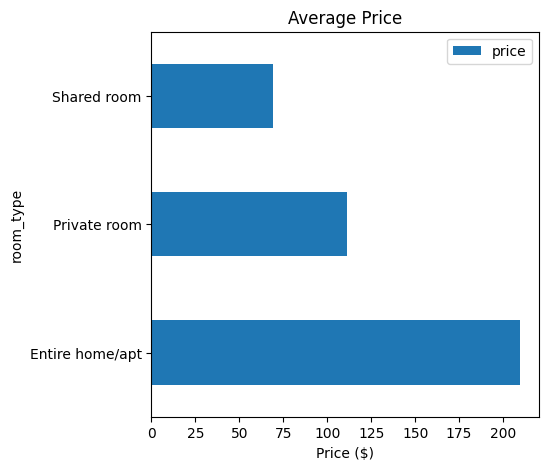

In [366]:
price_means.sort_values(by=['price'], ascending=False).plot(kind='barh', figsize=(5, 5), title='Average Price')
plt.xlabel('Price ($)')


4.3.3 Geographical locations

In [367]:
df.loc[:,['latitude', 'longitude']].describe()

,latitude,longitude
count,6823.000000,6823.000000
mean,47.626627,-122.334067
std,0.049361,0.033188
min,47.495874,-122.419050
25%,47.602151,-122.356520
50%,47.623272,-122.332794
75%,47.664395,-122.310665
max,47.734010,-122.240870


4.3.4 Property information

In [368]:
df.loc[:,['accommodates', 'bedrooms', 'beds']].describe()

,accommodates,bedrooms,beds
count,6823.000000,5217.000000,6764.000000
mean,4.020079,1.937129,2.154938
std,2.566393,1.136013,1.485880
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,4.000000,2.000000,2.000000
75%,5.000000,2.000000,3.000000
max,16.000000,13.000000,16.000000


The data shows that the number of  bedrooms and beds are highly right skewed. To explore these outliers:

In [369]:
df.loc[df.accommodates == 16].shape[0]

54

It turns out there are 54 properties that can accommodate up to 16 people. So it is not that unusual.

In [370]:
df.loc[df.bedrooms == 13, ['listing_url','name','accommodates','bedrooms','beds','price']]

,listing_url,name,accommodates,bedrooms,beds,price
1630,https://www.airbnb.com/rooms/26756649,Villa in Seattle · ★5.0 · 13 bedrooms · 3 beds...,6,13.0,3.0,975.0


In [371]:
df.loc[df.beds == 16, ['listing_url','name','bedrooms','beds','price']]

,listing_url,name,bedrooms,beds,price
1561,https://www.airbnb.com/rooms/25582819,Home in Seattle · ★4.71 · 7 bedrooms · 16 beds...,7.0,16.0,627.0
2245,https://www.airbnb.com/rooms/40411891,Home in Seattle · ★4.77 · 7 bedrooms · 16 beds...,7.0,16.0,428.0


**Booking Policy**

In [372]:
df.loc[:,['minimum_nights']].describe()

,minimum_nights
count,6823.000000
mean,11.784552
std,24.305508
min,1.000000
25%,2.000000
50%,2.000000
75%,30.000000
max,999.000000


The maximum nights with maximum values of stay of 999 seems unreasonable. The listing url is visited to investigate further.

In [373]:
df.loc[df.minimum_nights==999,['id','listing_url','name','price','minimum_nights']]

,id,listing_url,name,price,minimum_nights
990,17095283,https://www.airbnb.com/rooms/17095283,Guesthouse in Seattle · ★4.98 · Studio · 1 bed...,119.0,999


In [374]:
# Create a new DataFrame excluding the rows where minimum_nights == 999
df = df[df.minimum_nights != 999]

In [375]:
df.shape

(6822, 74)

**Availability**

In [376]:
df.loc[:,['availability_30', 'availability_60', 'availability_90', 'availability_365']].describe()

,availability_30,availability_60,availability_90,availability_365
count,6822.000000,6822.000000,6822.000000,6822.000000
mean,11.942539,29.647611,49.992817,188.416154
std,10.384130,20.866070,31.065161,128.253830
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,23.000000,72.000000
50%,10.000000,31.000000,57.000000,177.000000
75%,21.000000,48.000000,77.000000,320.000000
max,30.000000,60.000000,90.000000,365.000000


**Reviews**

In [377]:
df.loc[:,['number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']].describe()

,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,6822.000000,6822.000000,5833.00000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5830.000000,5831.000000
mean,67.274846,17.804163,4.78666,4.825627,4.804365,4.871248,4.865479,4.824783,4.696858,2.316315
std,105.909076,23.140470,0.37545,0.330176,0.339530,0.298448,0.342235,0.281971,0.385297,2.066685
min,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,3.000000,1.000000,4.75000,4.800000,4.760000,4.870000,4.880000,4.790000,4.640000,0.640000
50%,26.000000,8.000000,4.89000,4.920000,4.910000,4.960000,4.960000,4.900000,4.800000,1.850000
75%,85.000000,28.000000,4.98000,4.990000,4.990000,5.000000,5.000000,4.970000,4.900000,3.440000
max,1319.000000,353.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,20.790000


**Missing values imputation**

In this section, the missing values of the both numeric and categorical features will be addressed. Again, only features likely relevant to data analysis will be investigated.

##Number Of Missing Values By Row

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [378]:
# Calculate the number of missing values for each row
missing = pd.concat([df.isnull().sum(axis=1), 100 * df.isnull().mean(axis=1)], axis=1)
#This calculates the percentage of missing values in each row
#pd.concat(...): This concatenates the two resulting Series (count and percentage)
#along the columns axis to create a DataFrame called missing
# Assign column names
missing.columns = ['count', '%']

# Sort the DataFrame by the count of missing values in descending order and display the top 10 rows
missing.sort_values(by='count', ascending=False).head(100)


,count,%
1928,19,25.675676
5721,19,25.675676
2101,19,25.675676
640,19,25.675676
266,19,25.675676
...,...,...
4675,15,20.270270
3475,15,20.270270
4897,15,20.270270
4891,15,20.270270


In [379]:
# This line of code retrieves the unique values in the column labeled '%', from the DataFrame 'missing'.
unique_percentage_values = missing['%'].unique()
unique_percentage_values

array([ 0.        ,  1.35135135,  5.40540541,  2.7027027 ,  4.05405405,
       17.56756757,  9.45945946,  8.10810811,  6.75675676, 25.67567568,
       18.91891892, 20.27027027, 14.86486486, 16.21621622, 10.81081081,
       21.62162162, 22.97297297, 13.51351351, 24.32432432, 12.16216216])

In [380]:
# This counts the frequency of each unique value in the column labeled '%', from the DataFrame 'missing'.
percentage_value_counts = missing['%'].value_counts()
percentage_value_counts


0.000000     1852
1.351351     1404
2.702703     1018
4.054054      738
5.405405      437
14.864865     310
16.216216     217
17.567568     192
6.756757      191
8.108108      117
18.918919      80
9.459459       59
13.513514      57
20.270270      55
21.621622      34
22.972973      25
10.810811      15
25.675676      11
24.324324       9
12.162162       1
Name: %, dtype: int64

This is almost as if values have been removed artificially... Nevertheless, what we don't know is how useful the missing features are in predicting price. You shouldn't just drop rows that are missing several useless features.

**Numeric features**

In [381]:
num_with_na = []
numeric_features = [col for col in df.columns if df[col].dtype in ['int64','float64']]

for col in numeric_features:
    if df[col].isnull().sum() > 0:
        print(f'{col} has {df[col].isnull().sum()} missing values')
        num_with_na.append(col)

host_response_rate has 715 missing values
host_acceptance_rate has 508 missing values
bedrooms has 1605 missing values
beds has 59 missing values
review_scores_rating has 989 missing values
review_scores_accuracy has 991 missing values
review_scores_cleanliness has 991 missing values
review_scores_checkin has 991 missing values
review_scores_communication has 991 missing values
review_scores_location has 991 missing values
review_scores_value has 992 missing values
reviews_per_month has 991 missing values


It is uncertain why the features host_response_rate,host_acceptance_rate,bedrooms, beds are missing.
To impute those features, the following steps are used:
1. Create a new column to record the rows with missing values (with name [COL]_NA) 2. Impute columns with column median

In [382]:
cat_with_na = []
categorical_features = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_features:
    if df[col].isnull().sum() > 0:
        print(f'{col} has {df[col].isnull().sum()} missing values')
        cat_with_na.append(col)


description has 7 missing values
neighborhood_overview has 1821 missing values
host_location has 1041 missing values
host_about has 2026 missing values
host_neighbourhood has 328 missing values
neighbourhood has 1821 missing values
license has 1411 missing values


In [383]:
for col in ['host_acceptance_rate','host_response_rate','bedrooms','beds']:
    df[col+'_NA'] = np.where(df[col].isnull(),True, False)
    m = df[col].median()
    df[col].fillna(m,inplace=True)

For review scores, the missing values are likely due to the fact that the listings are new with no or few customers. To impute, the following steps are used: 1. Create a new column to record the rows with missing values (with name [COL]_NA) 2. Impute columns with median

In [384]:
for col in ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
           'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']:
    df[col+'_NA'] = np.where(df[col].isnull(),True, False)
    df[col].fillna(df[col].median(),inplace=True)

**Categorical Features**

In [385]:
#generate column list for category features
cat_features = [col for col in df.columns if df[col].dtype.name == "category"]
print(cat_features)

['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'has_availability', 'instant_bookable']


In [386]:
cat_with_na = []
categorical_features = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_features:
    if df[col].isnull().sum() > 0:
        print(f'{col} has {df[col].isnull().sum()} missing values')
        cat_with_na.append(col)


description has 7 missing values
neighborhood_overview has 1821 missing values
host_location has 1041 missing values
host_about has 2026 missing values
host_neighbourhood has 328 missing values
neighbourhood has 1821 missing values
license has 1411 missing values


In [387]:
cat_with_na = []
for col in cat_features:
    if df[col].isnull().sum() > 0:
        print(f'{col} has {df[col].isnull().sum()} missing values')
        cat_with_na.append(col)

host_response_time has 715 missing values


To impute for host response time, the following steps are used: 1. Create a new column to record the rows with missing values (with name [COL]_NA) 2. Impute columns with mode

In [388]:
for col in cat_with_na:
    df[col+"_NA"] = np.where(df[col].isnull(),1,0)
    df[col].fillna(df[col].mode().iloc[0],inplace=True)

**Datetime Features**

In [389]:
df.host_since.dtypes

dtype('<M8[ns]')

In [390]:
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print("Datetime Columns:", datetime_columns)

Datetime Columns: ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']


In [391]:
#generate column list for datetime features
dt_features = [col for col in df.columns if df[col].dtype == "<M8[ns]"]
print(dt_features)

['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']


In [392]:
dt_with_na = []
for col in dt_features:
    if df[col].isnull().sum() > 0:
        print(f'{col} has {df[col].isnull().sum()} missing values')
        dt_with_na.append(col)

first_review has 991 missing values
last_review has 991 missing values


To impute for the missing values, the following steps are used: 1. Create a new column to record the rows with missing values (with name [COL]_NA) 2. Impute columns with median (quantile = 0.5)

In [393]:
for col in dt_with_na:
    df[col+"_NA"] = np.where(df[col].isnull(),1,0)
    df[col].fillna(df[col].quantile(0.5),inplace=True)

**Correlation Analysis of Key Features in Airbnb Listings**

<ipython-input-394-3d7eb50786f5>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selected_df.corr()


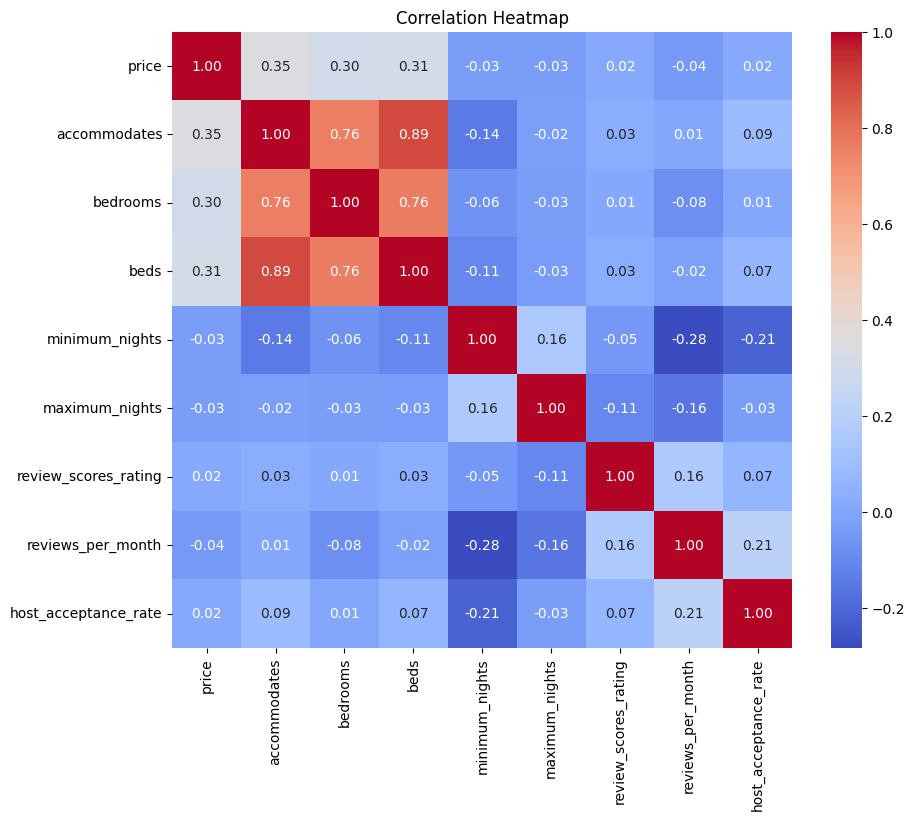

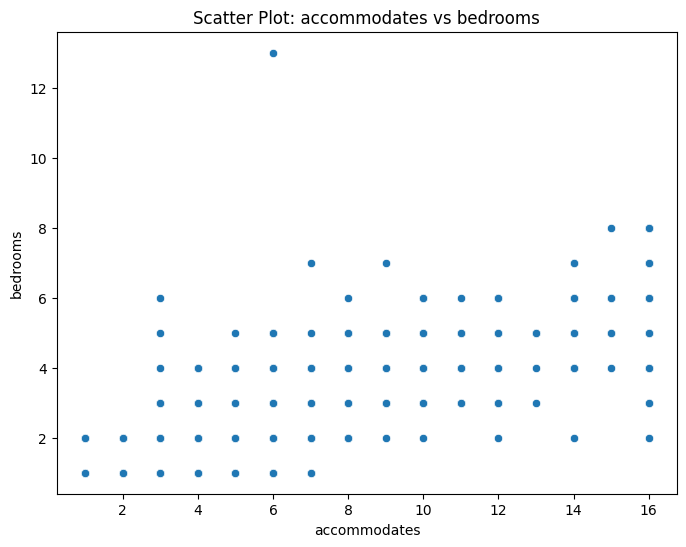

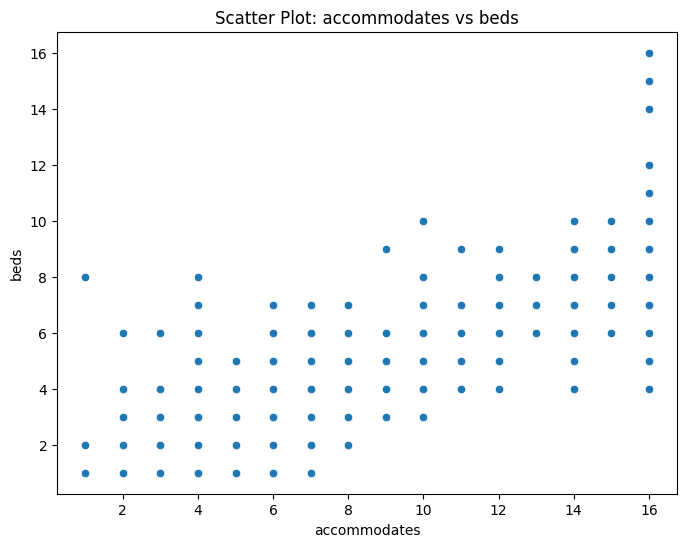

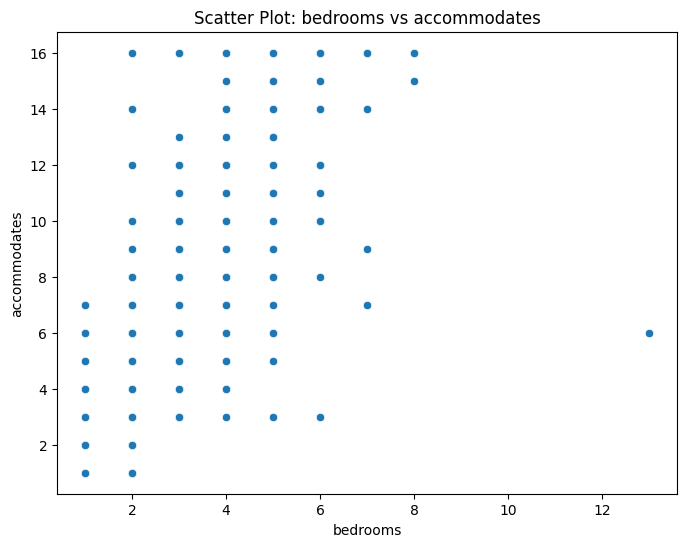

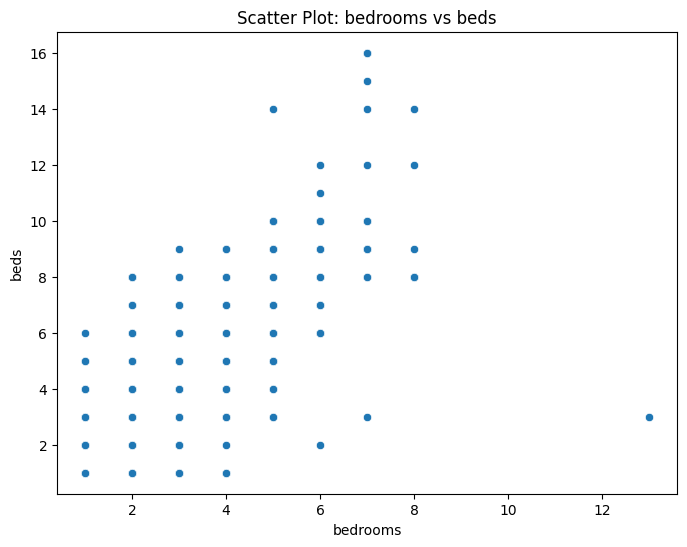

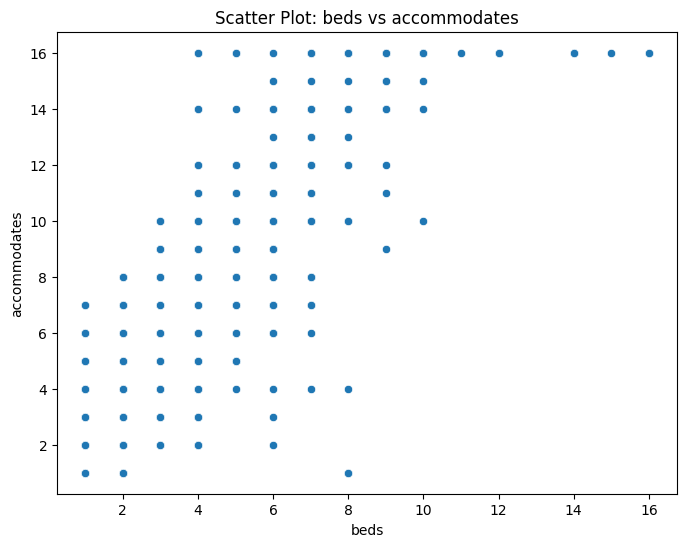

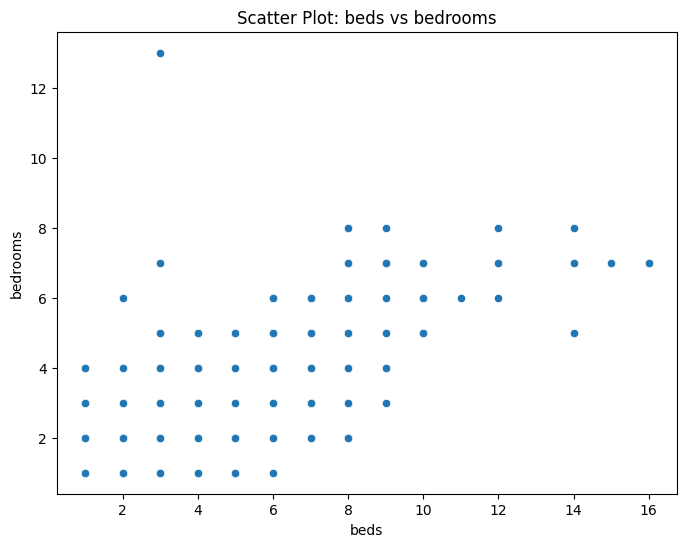

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
selected_columns = ['room_type', 'price', 'accommodates', 'bedrooms', 'beds',
                    'minimum_nights', 'maximum_nights', 'review_scores_rating',
                    'reviews_per_month', 'host_acceptance_rate']

# Create a new DataFrame with only the selected columns
selected_df = df[selected_columns]

# Generate the correlation matrix
corr_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Identify pairs with correlation coefficient > 0.75
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns
                   for col2 in corr_matrix.columns
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.75]

# Generate scatter plots for high correlation pairs
for col1, col2 in high_corr_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col1, y=col2, data=selected_df)
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.show()

##**New Feature Creation**

The column amenities contains a string of available amenities for reach listing.

In [395]:
df.amenities.head()

0    ["Extra pillows and blankets", "Shampoo", "Pet...
1    ["Extra pillows and blankets", "Shampoo", "Sha...
2    ["Mountain view", "Extra pillows and blankets"...
3    ["Extra pillows and blankets", "Shampoo", "Bat...
4    ["Shampoo", "Hot water", "Dishwasher", "TV wit...
Name: amenities, dtype: object

In [396]:
df.shape

(6822, 89)

First, create a new column with the string converted to a list:

In [397]:
df['amenities_list'] = df['amenities'].str.lower().str.replace('[{}"]','').str.split(',')

<ipython-input-397-1df970b85ceb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['amenities_list'] = df['amenities'].str.lower().str.replace('[{}"]','').str.split(',')


In [398]:
df['amenities_list'].head()

0    [[extra pillows and blankets,  shampoo,  pets ...
1    [[extra pillows and blankets,  shampoo,  share...
2    [[mountain view,  extra pillows and blankets, ...
3    [[extra pillows and blankets,  shampoo,  batht...
4    [[shampoo,  hot water,  dishwasher,  tv with s...
Name: amenities_list, dtype: object

In [399]:
#Create amenities set
amenities_set = set()
for i in df['amenities_list']:
    amenities_set.update(i)
print(amenities_set)

{' fast wifi \\u2013 210 mbps]', ' bosch oven', ' 65\\ hdtv with amazon prime video', ' frigidaire smooth-top electric  stainless steel single oven', ' paid parking lot on premises \\u2013 10 spaces', ' frigidaire  single oven', ' free residential garage on premises', ' alba organics fragrance free shampoo', ' stainless steel double oven', ' frigidaire  stainless steel oven', ' bio silk  conditioner', '[paid parking garage on premises \\u2013 100 spaces', ' changing table', ' common conditioner', ' amazon hypoallergenic shampoo]', ' 42\\ hdtv with apple tv', ' electrolux stainless steel electric stove', ' fast wifi \\u2013 71 mbps', ' alexa dot sound system', ' children\\u2019s books and toys', ' ogx shampoo', '[board games', ' 4-burner miele stainless steel gas stove', ' free parking garage on premises \\u2013 4 spaces', ' fllibretazzoni italia  stainless steel double oven', ' fast wifi \\u2013 472 mbps', ' 60\\ hdtv with roku', " harry's body soap", ' bbq grill', ' ginger lily farms 

In [400]:
len(amenities_set)

3060

In total, there are 3060 unique amenities. There one with null entry (1st item) which will be removed.

Next, dummy variables are created for each item and each listing. Values of True and False will be assigned according to their availability.

In [401]:
for item in amenities_set:
    df['amenities_' + item] = df.amenities_list.apply(lambda x: 1 if item in x else 0)

Streaming output truncated to the last 5000 lines.
<ipython-input-401-b2c280483810>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['amenities_' + item] = df.amenities_list.apply(lambda x: 1 if item in x else 0)
<ipython-input-401-b2c280483810>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['amenities_' + item] = df.amenities_list.apply(lambda x: 1 if item in x else 0)
<ipython-input-401-b2c280483810>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

In [402]:
for item in amenities_set:
    print(f'Number of listings with {item}: {df["amenities_" + item].sum()}')

Number of listings with  fast wifi \u2013 210 mbps]: 1
Number of listings with  bosch oven: 1
Number of listings with  65\ hdtv with amazon prime video: 69
Number of listings with  frigidaire smooth-top electric  stainless steel single oven: 1
Number of listings with  paid parking lot on premises \u2013 10 spaces: 3
Number of listings with  frigidaire  single oven: 1
Number of listings with  free residential garage on premises: 8
Number of listings with  alba organics fragrance free shampoo: 1
Number of listings with  stainless steel double oven: 22
Number of listings with  frigidaire  stainless steel oven: 2
Number of listings with  bio silk  conditioner: 1
Number of listings with [paid parking garage on premises \u2013 100 spaces: 5
Number of listings with  changing table: 65
Number of listings with  common conditioner: 1
Number of listings with  amazon hypoallergenic shampoo]: 1
Number of listings with  42\ hdtv with apple tv: 4
Number of listings with  electrolux stainless steel el

In addition to longitude and latitude, some other columns may also contain useful geographical information, namely street, city, zipcode, market, and smart_location.

In [403]:
ref_date = datetime.datetime(2023,9,18)

In [404]:
(ref_date - df['host_since'][1]).days

5153

In [405]:
dt_col = ['host_since','first_review','last_review']
for col in dt_col:
    df['days_since'+col] = df[col].apply(lambda x: (ref_date - x).days)

<ipython-input-405-45241c57437d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['days_since'+col] = df[col].apply(lambda x: (ref_date - x).days)
<ipython-input-405-45241c57437d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['days_since'+col] = df[col].apply(lambda x: (ref_date - x).days)
<ipython-input-405-45241c57437d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

In [406]:
df_new=df

In [407]:
df_new.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_NA,host_acceptance_rate_NA,host_response_rate_NA,bedrooms_NA,beds_NA,review_scores_rating_NA,review_scores_accuracy_NA,review_scores_cleanliness_NA,review_scores_checkin_NA,review_scores_communication_NA,review_scores_location_NA,review_scores_value_NA,reviews_per_month_NA,host_response_time_NA,first_review_NA,last_review_NA,amenities_list,amenities_ fast wifi \u2013 210 mbps],amenities_ bosch oven,amenities_ 65\ hdtv with amazon prime video,amenities_ frigidaire smooth-top electric stainless steel single oven,amenities_ paid parking lot on premises \u2013 10 spaces,amenities_ frigidaire single oven,amenities_ free residential garage on premises,amenities_ alba organics fragrance free shampoo,amenities_ stainless steel double oven,amenities_ frigidaire stainless steel oven,...,amenities_ keurig coffee machine,amenities_ beko refrigerator,amenities_ your fridge is in the kitchen white color. refrigerator,amenities_ fast wifi \u2013 676 mbps,amenities_ nespresso,amenities_ fast wifi \u2013 507 mbps,amenities_ new electric oven,amenities_ honest company body soap,amenities_ paid parking lot on premises,amenities_[fast wifi \u2013 468 mbps,amenities_ amazon echo dot sound system with bluetooth and aux,amenities_ fast wifi \u2013 651 mbps],amenities_ 48\ tv with hbo max,amenities_ shaklee body soap,amenities_[airfryer stainless steel oven,amenities_ fast wifi \u2013 783 mbps,amenities_ comiso bluetooth speaker in room,amenities_ mosquito net,amenities_ bertazzoni stainless steel gas stove,amenities_ premium brands that are my favorites shampoo,amenities_ fast wifi \u2013 287 mbps,amenities_ 55\ hdtv with dvd player,amenities_ hot plate stove,amenities_ 58\ hdtv with fire tv,amenities_ panteen prov conditioner,amenities_ kristin ess. conditioner,amenities_ head & shoulders shampoo,amenities_ 37\ hdtv with fire tv,amenities_ smeg refrigerator,amenities_ fast wifi \u2013 600 mbps,amenities_ 45\ hdtv,amenities_ wifi \u2013 15 mbps,amenities_ fast wifi \u2013 474 mbps,amenities_ varied body soap,amenities_ frigidaire electric stove,amenities_ rudy's conditioner,amenities_[dove shampoo,amenities_ other stainless steel gas stove,amenities_ other electric stove,amenities_ and xbox series x,amenities_ fast wifi \u2013 145 mbps,amenities_ affinia conditioner,amenities_ fast wifi \u2013 629 mbps,amenities_ fast wifi \u2013 433 mbps,amenities_ gas oven,amenities_ bikes,amenities_ paraben & sulfate free body soap,amenities_ ski-in/ski-out \u2013 near ski lifts,amenities_[fast wifi \u2013 127 mbps,amenities_ bed linens,amenities_ ginger lily farms aloe vera conditioner conditioner,amenities_ ge-gas stainless steel oven,amenities_ bbq grill: electric,ameni

In [408]:
df[df.availability_365==0].shape[0]

678

In [409]:
df_new.loc[6000,['listing_url','price','beds']]

listing_url    https://www.airbnb.com/rooms/881467389689440018
price                                                     83.0
beds                                                       2.0
Name: 6000, dtype: object

In [410]:
df_new.loc[df_new.beds_NA==True, ['listing_url','price','minimum_nights','availability_365']]

,listing_url,price,minimum_nights,availability_365
223,https://www.airbnb.com/rooms/3022308,113.0,30,104
297,https://www.airbnb.com/rooms/4279578,91.0,1,7
332,https://www.airbnb.com/rooms/4993710,120.0,30,365
365,https://www.airbnb.com/rooms/5749958,300.0,30,44
703,https://www.airbnb.com/rooms/12625278,53.0,30,352
995,https://www.airbnb.com/rooms/17228224,33.0,30,48
1909,https://www.airbnb.com/rooms/33429082,623.0,99,365
2013,https://www.airbnb.com/rooms/35641946,66.0,30,287
2014,https://www.airbnb.com/rooms/35641951,54.0,30,265
2015,https://www.airbnb.com/rooms/35641988,53.0,30,251


**Removal Irrelevant Variables**

As the final step, features that are likely irrelevant for data analysis are removed.

In [411]:
df_new.shape

(6822, 3153)

In [412]:
# Initialize an empty list to store string column names
l_str = []

# Loop through each column in the DataFrame
for col in df_new.columns:
    # Check if the data type of the column is 'object' (indicating string data)
    if df_new[col].dtype == 'O': #identifies columns with data type 'O', which typically indicates categorical or string data.
        # If it is, append the column name to the list
        l_str.append(col)

# Print the list of string column names
print(l_str)


['listing_url', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'bathrooms_text', 'amenities', 'license', 'amenities_list']


In [413]:
# Step 2: Drop the identified string columns
# List of string columns you want to drop
columns_to_remove = l_str

In [414]:
# Create a new DataFrame with only the relevant columns (excluding string columns)
df_filtered = df_new.drop(columns=columns_to_remove)

In [415]:
print("\nDataFrame after dropping string columns:")
print(df_filtered.info())


DataFrame after dropping string columns:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6822 entries, 0 to 6822
Columns: 3132 entries, id to days_sincelast_review
dtypes: bool(13), category(8), datetime64[ns](5), float64(17), int64(3089)
memory usage: 162.4 MB
None


In [416]:
df_filtered.shape #3060 is from amelities

(6822, 3132)

In [417]:
# # Assuming df is your DataFrame
# # df = ...

# # Step 1: Identify and create a list of numeric columns
# l_num = []

# # Loop through each column in the DataFrame
# for col in df.columns:
#     # Check if the data type of the column is numeric
#     if df[col].dtype in ['int64', 'float64']:
#         # If it is, append the column name to the list
#         l_num.append(col)

# # Print the list of numeric column names
# print("List of numeric columns:")
# print(l_num)

# # Step 2: Drop the identified numeric columns
# # List of numeric columns you want to drop
# columns_to_remove = l_num

# # Create a new DataFrame with only the relevant columns (excluding numeric columns)
# df_filtered = df.drop(columns=columns_to_remove)

# # Print information about the new DataFrame
# print("\nDataFrame after dropping numeric columns:")
# print(df_filtered.info())

# # If you want to apply this directly to the original DataFrame 'df', you can use:
# # df = df.drop(columns=columns_to_remove)


In [418]:
df_filtered.head()

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_NA,host_acceptance_rate_NA,host_response_rate_NA,bedrooms_NA,beds_NA,review_scores_rating_NA,review_scores_accuracy_NA,review_scores_cleanliness_NA,review_scores_checkin_NA,review_scores_communication_NA,review_scores_location_NA,review_scores_value_NA,reviews_per_month_NA,host_response_time_NA,first_review_NA,last_review_NA,amenities_ fast wifi \u2013 210 mbps],amenities_ bosch oven,amenities_ 65\ hdtv with amazon prime video,amenities_ frigidaire smooth-top electric stainless steel single oven,amenities_ paid parking lot on premises \u2013 10 spaces,amenities_ frigidaire single oven,amenities_ free residential garage on premises,amenities_ alba organics fragrance free shampoo,amenities_ stainless steel double oven,amenities_ frigidaire stainless steel oven,amenities_ bio silk conditioner,amenities_[paid parking garage on premises \u2013 100 spaces,amenities_ changing table,amenities_ common conditioner,amenities_ amazon hypoallergenic shampoo],amenities_ 42\ hdtv with apple tv,amenities_ electrolux stainless steel electric stove,amenities_ fast wifi \u2013 71 mbps,amenities_ alexa dot sound system,amenities_ children\u2019s books and toys,amenities_ ogx shampoo,amenities_[board games,amenities_ 4-burner miele stainless steel gas stove,amenities_ free parking garage on premises \u2013 4 spaces,amenities_ fllibretazzoni italia stainless steel double oven,amenities_ fast wifi \u2013 472 mbps,amenities_ 60\ hdtv with roku,amenities_ harry's body soap,amenities_ bbq grill,amenities_ ginger lily farms botanicals zeroderm advanced therapy moisturizing conditioner for all hair types,amenities_ viking electric stove,...,amenities_ keurig coffee machine,amenities_ beko refrigerator,amenities_ your fridge is in the kitchen white color. refrigerator,amenities_ fast wifi \u2013 676 mbps,amenities_ nespresso,amenities_ fast wifi \u2013 507 mbps,amenities_ new electric oven,amenities_ honest company body soap,amenities_ paid parking lot on premises,amenities_[fast wifi \u2013 468 mbps,amenities_ amazon echo dot sound system with bluetooth and aux,amenities_ fast wifi \u2013 651 mbps],amenities_ 48\ tv with hbo max,amenities_ shaklee body soap,amenities_[airfryer stainless steel oven,amenities_ fast wifi \u2013 783 mbps,amenities_ comiso bluetooth speaker in room,amenities_ mosquito net,amenities_ bertazzoni stainless steel gas stove,amenities_ premium brands that are my favorites shampoo,amenities_ fast wifi \u2013 287 mbps,amenities_ 55\ hdtv with dvd player,amenities_ hot plate stove,amenities_ 58\ hdtv with fire tv,amenities_ panteen prov conditioner,amenities_ kristin ess. conditioner,amenities_ head & shoulders shampoo,amenities_ 37\ hdtv with fire tv,amenities_ smeg refrigerator,amenities_ fast wifi \u2013 600 mbps,amenities_ 45\ hdtv,amenities_ wifi \u2013 15 mbps,amenities_ fast wifi \u2013 474 mbps,amenities_ varied body soap,amenities_ frigidaire electric stove,amenities_ rudy's conditioner,amenities_[dove shampoo,amenit

In [419]:
# Check if df_filtered has any missing values
has_missing = df_filtered.isna().any().any()

# Alternatively, you can use isnull() instead of isna():
# has_missing = df_filtered.isnull().any().any()

if has_missing:
    print("df_filtered has missing values.")
else:
    print("df_filtered does not have missing values.")


df_filtered does not have missing values.


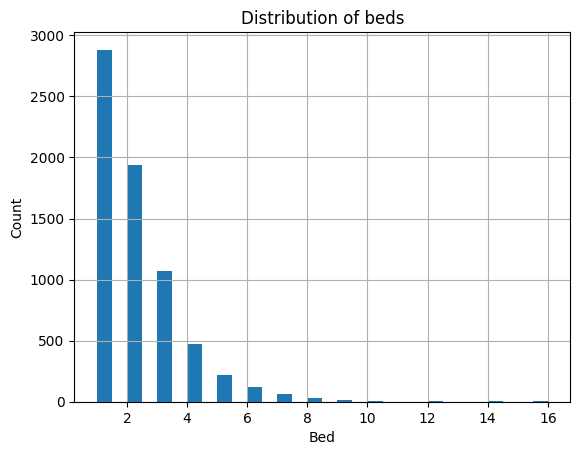

In [420]:
import matplotlib.pyplot as plt
df_filtered.beds.hist(bins=30)
plt.xlabel('Bed')
plt.ylabel('Count')
plt.title('Distribution of beds');

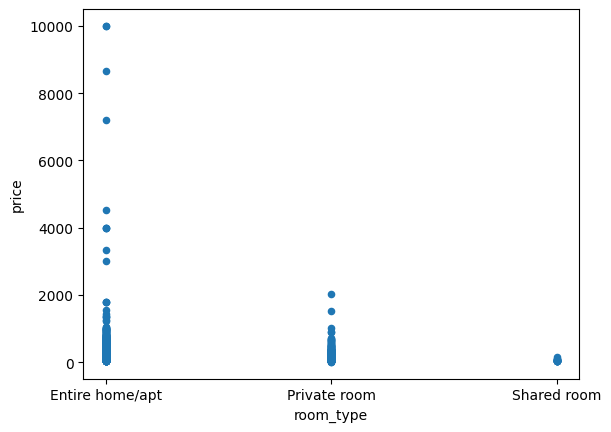

In [421]:

df_filtered.plot(x='room_type', y='price', kind='scatter');

##**Save Data**

In [422]:
# save the data to a new csv file
#datapath = '../data'
#save_file(ski_data, 'ski_data_cleaned.csv', datapath)

import os

def save_file(df, filename, path):
    filepath = os.path.join(path, filename)
    df.to_csv(filepath, index=False)

datapath = '/content/drive/MyDrive/DS-SB/Capstone-Two'
save_file(df_filtered, 'abnb_seattle.csv', datapath)


##**Summary**

**Summary**

---

**Data Wrangling for Airbnb Data**

In this phase of the project, extensive data wrangling techniques were applied to the Airbnb dataset in order to prepare it for further analysis and visualization. The following steps were undertaken:

1. **Column Selection and Removal**:
   - Initially, a careful review of the dataset's columns was conducted to identify those with excessive missing values or ones that did not contribute significantly to the analysis. These columns were subsequently removed to streamline the dataset for further processing.

2. **Outlier Detection and Handling**:
   - A comprehensive examination of the dataset revealed potential outliers in certain numerical features. These outliers were carefully inspected and addressed through strategies such as capping, transformations, or, in some cases, removal.

3. **Data Imputation**:
   - Missing data can have a substantial impact on the quality of analysis. To mitigate this, appropriate imputation methods were employed to fill in missing values in critical columns. Techniques like median imputation, mean imputation, were employed based on the specific feature and its distribution.

4. **Feature Engineering**:
   - The process of feature engineering involved creating new attributes or modifying existing ones to extract additional insights from the data. This step helped enhance the dataset's richness and provided more depth for analysis.

5. **Handling Categorical Data**:
   - Categorical variables were examined to determine the best approach for encoding them. Techniques such as one-hot encoding or label encoding were applied based on the nature of the categorical feature and its significance to the analysis.

6. **Data Normalization/Standardization**:
   - In order to facilitate meaningful comparisons and analyses, numerical features were standardized or normalized as needed, ensuring a consistent scale across the dataset.

7. **Dimensionality Reduction (if applicable)**:
   - In cases where the dataset exhibited high dimensionality, techniques like Principal Component Analysis (PCA) or feature selection methods can be implemented. But on this data, we have not implemented it.

8. **Additional Data Cleaning**:
   - Miscellaneous data cleaning tasks were performed to address any remaining inconsistencies, anomalies, or inaccuracies that might hinder further analysis.

9. **Visualization and Exploratory Data Analysis (EDA)**:
   - Beyond data wrangling, exploratory data analysis (EDA) was conducted to gain deeper insights into the dataset. This included visualizations like histograms, box plots, scatter plots, and correlation matrices to uncover patterns, relationships, and trends within the data.

10. **Documentation and Recordkeeping**:
    - Throughout the data wrangling process, detailed documentation was maintained to track the changes made, reasons for those changes, and any specific observations or insights gathered during the process.

---

With these comprehensive data wrangling steps completed, the dataset is now well-prepared for the subsequent phase of the project, which focuses on data visualization and extracting actionable insights. The visualization results and analytical findings will be presented in upcoming notebooks, providing a robust foundation for making informed decisions and drawing meaningful conclusions.